# Introduction

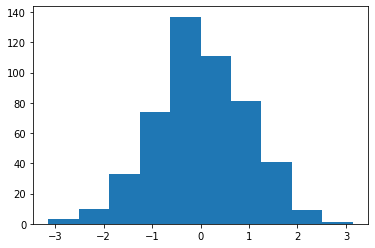

In [10]:
from random import gauss
import matplotlib.pyplot as plt

%matplotlib inline

l = [gauss(0,1) for _ in range(500)]
plt.hist(l)
plt.show()

# Importing dataframe with pandas

In [1]:
import pandas as pd

df = pd.read_csv("glt.csv")
df.head(5)
dforder = df.sort_values(['City', 'Date'])
df = df.drop(df.columns[[0, 2, 4, 5, 6]], axis=1)

# Computing missing values

In [65]:
import math
nan_rows = df.loc[df['AverageTemperature'].isnull()]
#pd.set_option('mode.chained_assignment', None)
for (i, row) in nan_rows.iterrows():
    j = i+1
    preceding = df.iloc[i-1]
    following = df.iloc[i+1]
    if (following.City == row.City) & (preceding.City == row.City):
        while math.isnan(following.AverageTemperature):
            following = df.iloc[j+1]
            j=j+1# Computing missing values
        if math.isnan(preceding.AverageTemperature):
            df.loc[i, 'AverageTemperature'] = (0 + following.AverageTemperature) / 2  
        df.loc[i, 'AverageTemperature'] = (preceding.AverageTemperature + following.AverageTemperature) / 2  
    # df.iloc[i].AverageTemperature = result N0N VIENE ASSEGNATO

# Hottest and coldest temperatures function

In [57]:
def temperatures(name, N):
    data = df.loc[df['City'] == name]
    data = data.sort_values(by=['AverageTemperature'])
    hottest = data.head(N)# Computing missing values
    coldest = data.tail(N).iloc[::-1]
    print("Hottest" + "%i" %N + "temperatures in" + name)
    print(hottest)
    print("Coldest" + "%i" %N + "temperatures in" + name)
    print(coldest)
    

# Parameters: ("Bangkok", 5)

In [58]:
temperatures("Bangkok", 5)

Hottest5temperatures inBangkok
       AverageTemperature     City
19487             71.4092  Bangkok
18023             71.4686  Bangkok
19224             72.0554  Bangkok
18923             72.1526  Bangkok
19199             72.4856  Bangkok
Coldest5temperatures inBangkok
       AverageTemperature     City
20332             88.0070  Bangkok
20331             87.9548  Bangkok
20187             87.8396  Bangkok
19887             87.7694  Bangkok
18074             87.7118  Bangkok


# Distribution of the average land temperatures for Rome and Bangkok

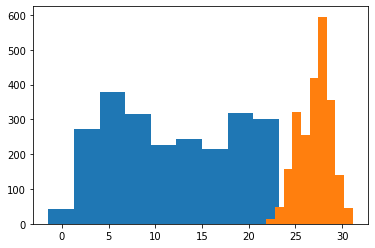

In [67]:
pd.set_option('mode.chained_assignment', None)
dataRome = df.loc[df['City'] == 'Rome']
dataBangkok = df.loc[df['City'] == 'Bangkok']
for (i, row) in dataBangkok.iterrows():
    dataBangkok.loc[i, 'AverageTemperature'] = (dataBangkok.loc[i, 'AverageTemperature'] -32)/1.8
    
l1 = dataRome['AverageTemperature']
plt.hist(l1)

l2 = dataBangkok['AverageTemperature']
plt.hist(l2)
plt.show()
